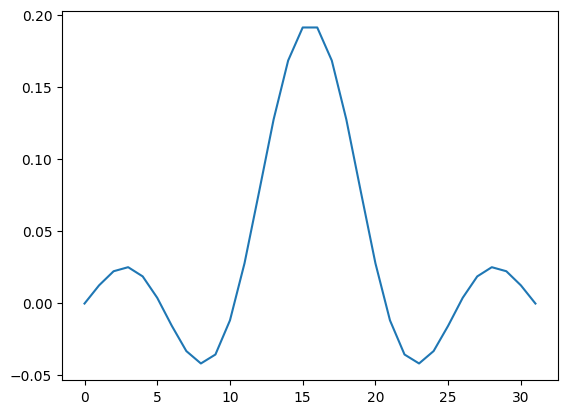

[-0.0004515765033069602, 0.012167416885000608, 0.021949904508023015, 0.024761196695226084, 0.01836966744639264, 0.003515879564384657, -0.015864343733635253, -0.03341985593738183, -0.04201790904093568, -0.0358032802685627, -0.012092065362491031, 0.027479391609960907, 0.07694069300451686, 0.12718260896371422, 0.16808387795383287, 0.19101133681251173, 0.19101133681251173, 0.16808387795383287, 0.12718260896371422, 0.07694069300451686, 0.027479391609960907, -0.012092065362491031, -0.0358032802685627, -0.04201790904093568, -0.03341985593738183, -0.015864343733635253, 0.003515879564384657, 0.01836966744639264, 0.024761196695226084, 0.021949904508023015, 0.012167416885000608, -0.0004515765033069602]


In [92]:
import matplotlib.pyplot as plt
import numpy as np

FC = 0.097
TAPS = 32
offset = TAPS/2 - 0.5

coef = [0] * TAPS
w = FC*2*np.pi

for i in range(TAPS):
    x = np.abs(i - offset)
    if 0==x:
        coef[i] = 2 * FC
    else:
        coef[i] = 2 * FC * np.sin(x * w) / (x * w)

plt.plot(coef)
plt.show()
print(f'{coef}')

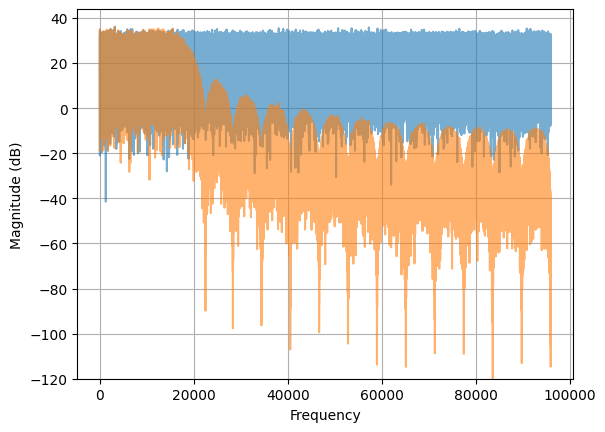

In [95]:
AUDIO_LEN_SEC = 10
SAMPLE_RATE = 192000

noise = np.random.rand(AUDIO_LEN_SEC * SAMPLE_RATE) * 2 - 1

noise *= 32768

from scipy import signal
fn = signal.convolve(noise,coef)
# plt.specgram(fn,Fs=SAMPLE_RATE,scale="dB")
plt.magnitude_spectrum(noise,Fs=SAMPLE_RATE, scale='dB', alpha=0.6)
plt.magnitude_spectrum(fn,Fs=SAMPLE_RATE, scale='dB', alpha=0.6)
plt.ylim(-120)
# plt.xscale('log')
plt.grid()
plt.show()

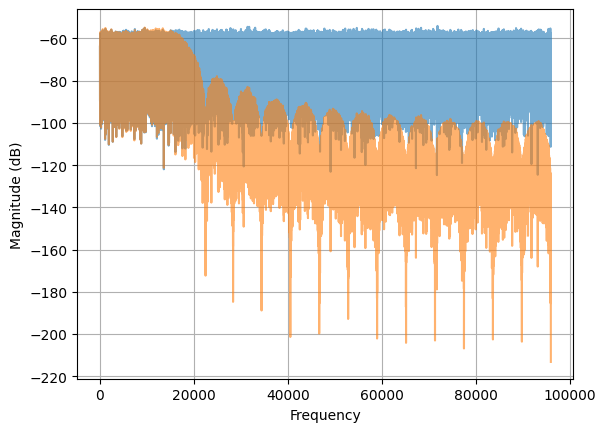

In [94]:
buffer = np.zeros(TAPS)
result = np.array(noise)
for i,value in enumerate(noise):
    buffer = np.roll(buffer, 1)
    buffer[0] = value
    result[i] = np.sum(buffer * coef)

plt.magnitude_spectrum(noise,Fs=SAMPLE_RATE, scale='dB', alpha=0.6)
plt.magnitude_spectrum(result,Fs=SAMPLE_RATE, scale='dB', alpha=0.6)
plt.grid()
plt.show()